In [70]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from utilitaires import  find_permutation


In [71]:
#chargement de base de données iris
iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [72]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [73]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [74]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [75]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [76]:
#Stocker les données en tant que DataFrame Pandas
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

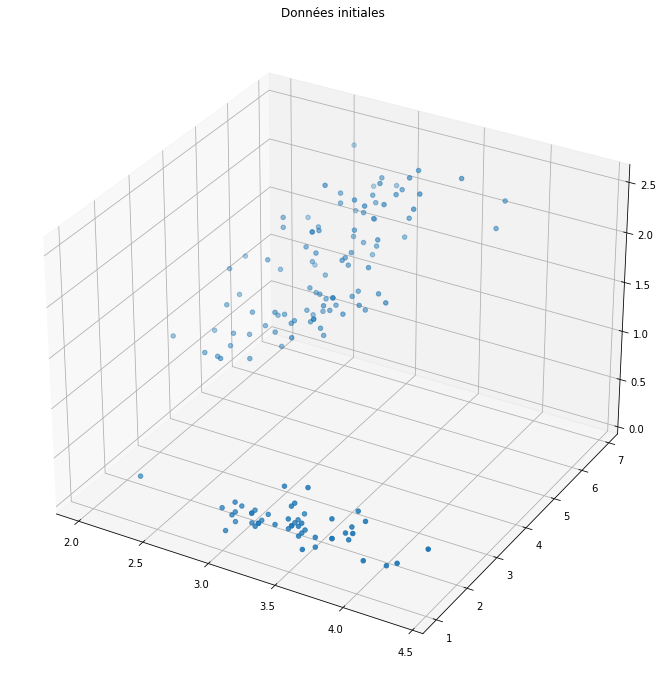

In [77]:
# Representation 3D des données (les données ont 4 dimensions 
#ici je choisis les 3 dernières dimensions)
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter(x.Sepal_width, x.Petal_Length, x.Petal_width)
plt.title("Données initiales")
plt.show()

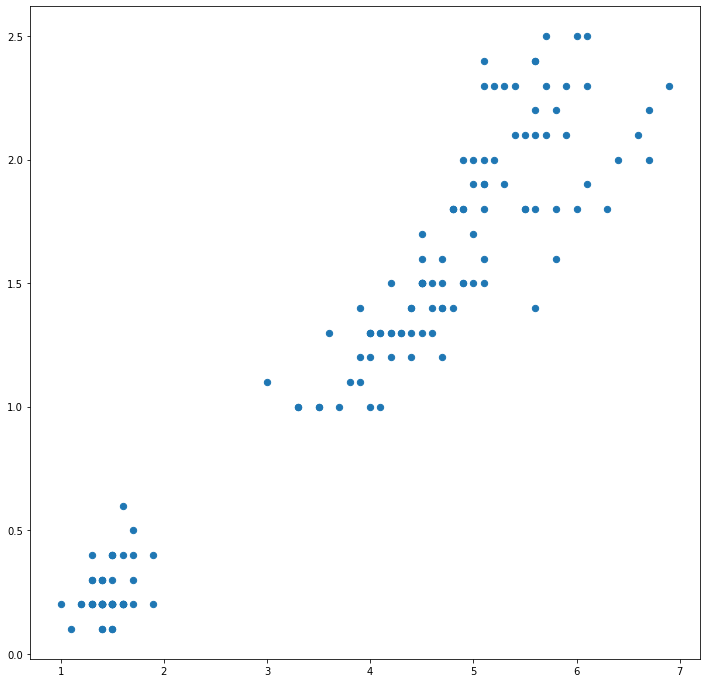

In [78]:
#Representation des donnees en 2D : je travaille avec les deux dernières 
#dimensions.
colormap =np.array(['BLUE','GREEN','CYAN'])
plt.figure(figsize=(12, 12))
plt.scatter(x.Petal_Length, x.Petal_width,s=40)

In [79]:
#Cluster K-means
model=KMeans(n_clusters=3)
#ajuster le modèle de données (on ne travaille qu'avec les deux dernières dimensions)
model.fit(x)
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


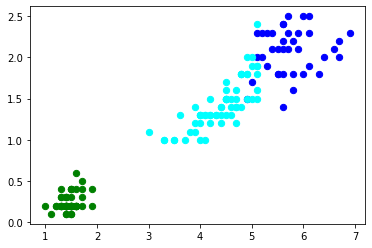

In [80]:
#Affichage des clusters
dat = iris.data[:,2:4] # donnees ne contenant que 'Petal_Length','Petal_width'
plt.scatter(dat[model.labels_==0][:,0], dat[model.labels_==0][:,1],
            c='BLUE',s=40)
plt.scatter(dat[model.labels_==1][:,0], dat[model.labels_==1][:,1],
            c='GREEN',s=40)
plt.scatter(dat[model.labels_==2][:,0], dat[model.labels_==2][:,1],
            c='CYAN',s=40)
plt.show()

In [81]:
sm.accuracy_score(iris.target,model.labels_)

0.09333333333333334

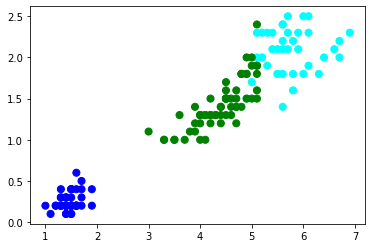

In [82]:
#Autre affichage des ces clusters
permutation = find_permutation(3, iris.target, model.labels_)
new_labels = [ permutation[label] for label in model.labels_]
plt.scatter(x.Petal_Length, x.Petal_width, c=colormap[new_labels], s=50, cmap='viridis')
centers = model.cluster_centers_

In [83]:
sm.accuracy_score(iris.target,new_labels)

0.8933333333333333

In [84]:
sm.silhouette_score(iris.data,model.labels_)

0.5528190123564095

Text(0, 0.5, 'Cout du modele(inertia')

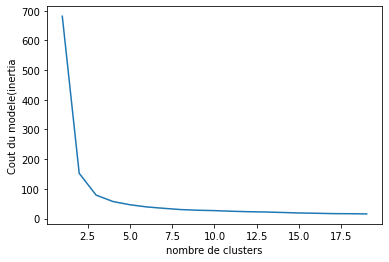

In [85]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(x)
    inertia.append(model.inertia_)

plt.plot(K_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele(inertia')